In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

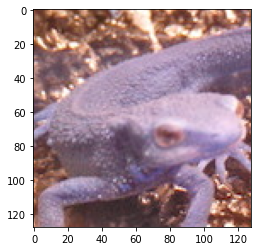

In [18]:
img = cv2.imread("imori.jpg")
plt.imshow(img)

In [24]:
def BGR2RGB(img):
    B = img[:,:,0].copy()
    G = img[:,:,1].copy()
    R = img[:,:,2].copy()
    
    img[:,:,0] = R
    img[:,:,1] = G
    img[:,:,2] = B
    
    return img

True

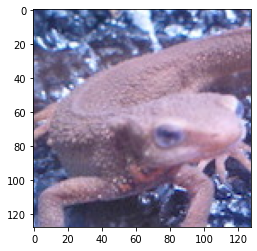

In [38]:
BGR2RGB(img)
plt.imshow(img)
cv2.imwrite("xiyi.jpg",img)

Y = 0.2126 * R + 0.7152 * G + 0.0722 * B

In [39]:
img = cv2.imread("xiyi.jpg")

In [40]:
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [41]:
cv_show("img",img)

In [42]:
def BGR2GRAY(img):
    B = img[:,:,0].copy()
    G = img[:,:,1].copy()
    R = img[:,:,2].copy()
    
    out = 0.2126 *R + 0.7152 * G + 0.0722 * B
    
    out = out.astype(np.uint8)
    
    return out

In [43]:
img2 = BGR2GRAY(img)

In [44]:
cv2.imwrite("img2.jpg",img2)

True

In [48]:
cv_show("img2",img2)

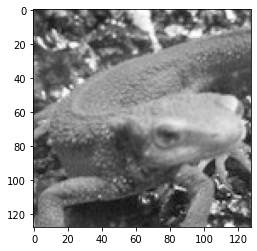

In [50]:
plt.imshow(img2,cmap = "gray")

$$ y= \begin{cases} 0& (\text{if}\quad y < 128) \ 255& (\text{else}) \end{cases} $$

In [51]:
img = cv2.imread("xiyi.jpg")

In [66]:
def BGR2THRESHOLDING(img,th=128):
    B = img[:,:,0].copy()
    G = img[:,:,1].copy()
    R = img[:,:,2].copy()
    
    out = 0.2126 *R + 0.7152 * G + 0.0722 * B
    
    out = out.astype(np.uint8)
    
    out[out < th] = 0
    out[out >= th] = 255 
    

    return out
    

In [69]:
out = BGR2THRESHOLDING(img)
cv_show("img",out)

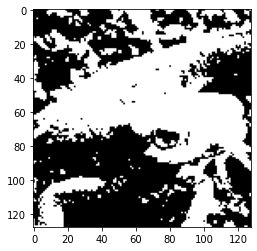

In [72]:
plt.imshow(out,cmap="gray")

使用大津算法来二值化图像吧。

大津算法，也被称作最大类间方差法，是一种可以自动确定二值化中阈值的算法。

从类内方差和类间方差的比值计算得来：

小于阈值$t$的类记作$0$，大于阈值$t$的类记作$1$；
$w_0$和$w_1$是被阈值$t$分开的两个类中的像素数占总像素数的比率（满足$w_0+w_1=1$）；
${S_0}^2$， ${S_1}^2$是这两个类中像素值的方差；
$M_0$，$M_1$是这两个类的像素值的平均值；
即：

类内方差：${S_w}^2=w_0\ {S_0}^2+w_1\ {S_1}^2$
类间方差：${S_b}^2 = w_0 \ (M_0 - M_t)^2 + w_1\ (M_1 - M_t)^2 = w_0\ w_1\ (M_0 - M_1) ^2$
图像所有像素的方差：${S_t}^2 = {S_w}^2 + {S_b}^2 = \text{常数}$
根据以上的式子，我们用以下的式子计算分离度$X$：^1

$$ X = \frac{{S_b}^2}{{S_w}^2} = \frac{{S_b}^2}{{S_t}^2 - {S_b}^2} $$

也就是说： $$ \arg\max\limits_{t}\ X=\arg\max\limits_{t}\ {S_b}^2 $$ 换言之，如果使${S_b}^2={w_0}\ {w_1}\ (M_0 - M_1)^2$最大，就可以得到最好的二值化阈值$t$。

In [ ]:
def BIG_THRESHOLDING(img):
    B = img[:,:,0].copy()
    G = img[:,:,1].copy()
    R = img[:,:,2].copy()
    GRAY = 0.2126*R + 0.7152*G + 0.0722*B
    GRAY = GRAY.astype(np.uint8)
    
    h = GRAY.shape[0]
    w = GRAY.shape[1]
    
    threshold_t = 0
    max_g = 0
    
    for t in range(255):
        n0 = gray